In [22]:
from PIL import Image
from PIL import ImageChops
from matplotlib import pyplot as plt
import PIL.ImageOps
import cv2
import numpy as np

In [11]:
origImg = Image.open(r"./RealCameraPics/no_queue_frame.jpg")
queueImg = Image.open(r"./RealCameraPics/person_drinking_small_queue.jpg")
origImg.size

(1920, 1080)

In [27]:
def pil2cv(pil_img):
    open_cv_image = np.array(pil_img) 
    # Convert RGB to BGR 
    return open_cv_image

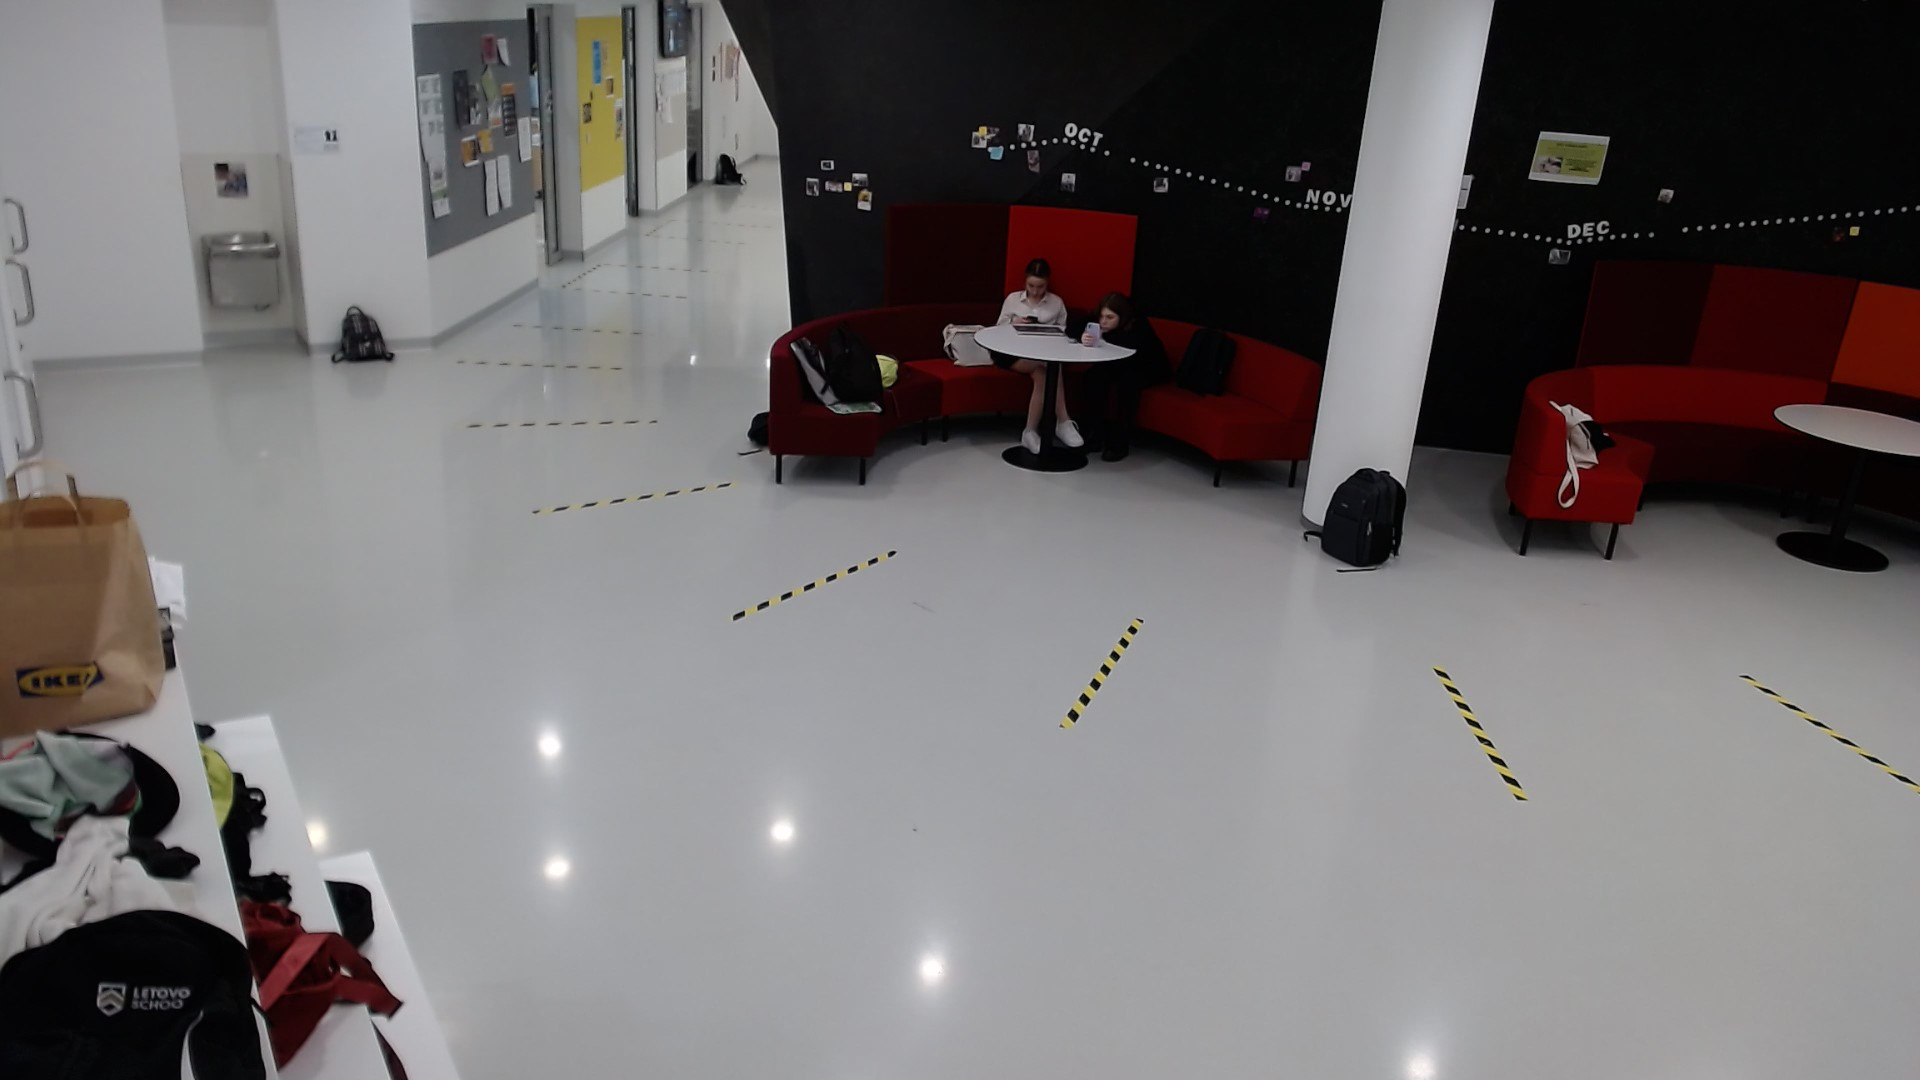

In [12]:
origImg

In [13]:
def scaleImage(img, outWidth):
    wpercent = (outWidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    downscaledFrame = img.resize((outWidth,hsize))  #, Image.BOX)
    return downscaledFrame

In [14]:
def reduceColor(img):
    monochromeImage = img.convert("L")
    return monochromeImage

In [15]:
def worsenImg(img, width):
    return reduceColor(scaleImage(img, width))

In [16]:
worseNoQueueImg = reduceColor(origImg)
worseQueueImg = reduceColor(queueImg)

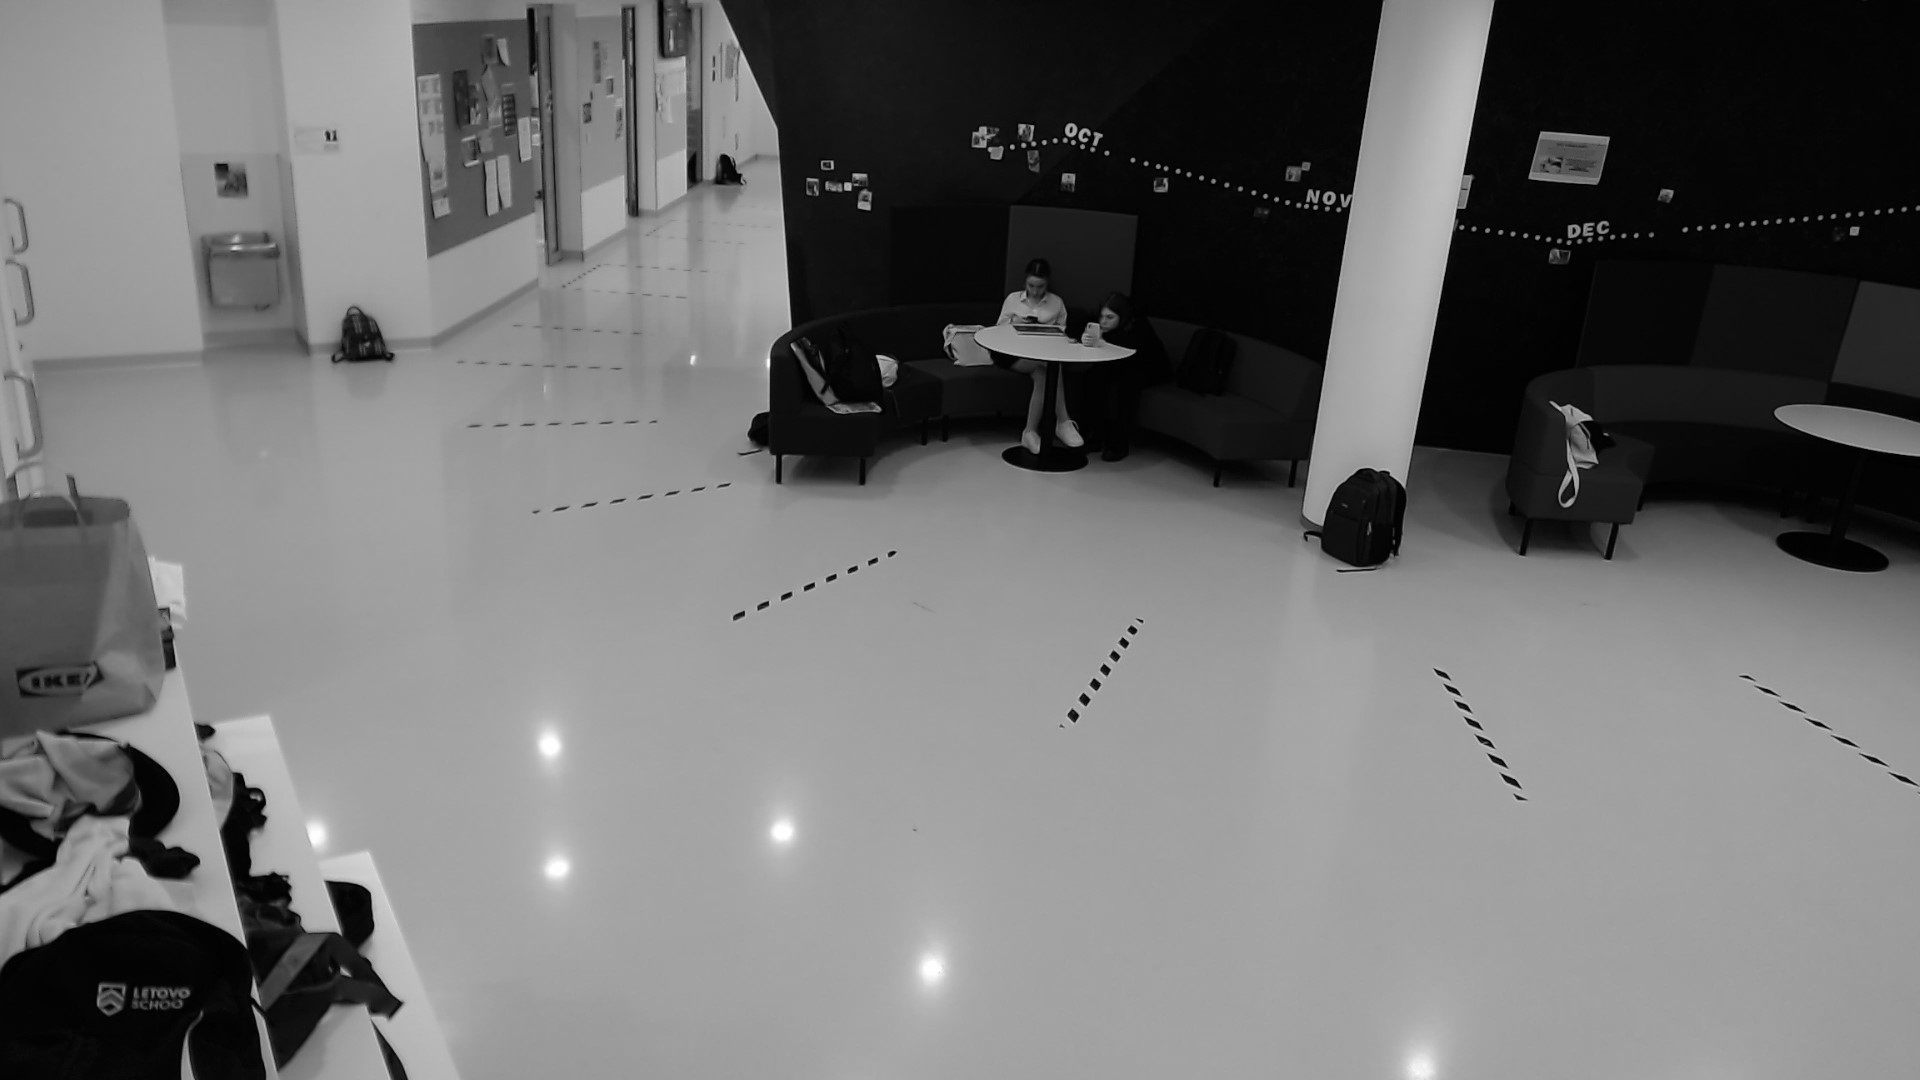

In [17]:
worseNoQueueImg

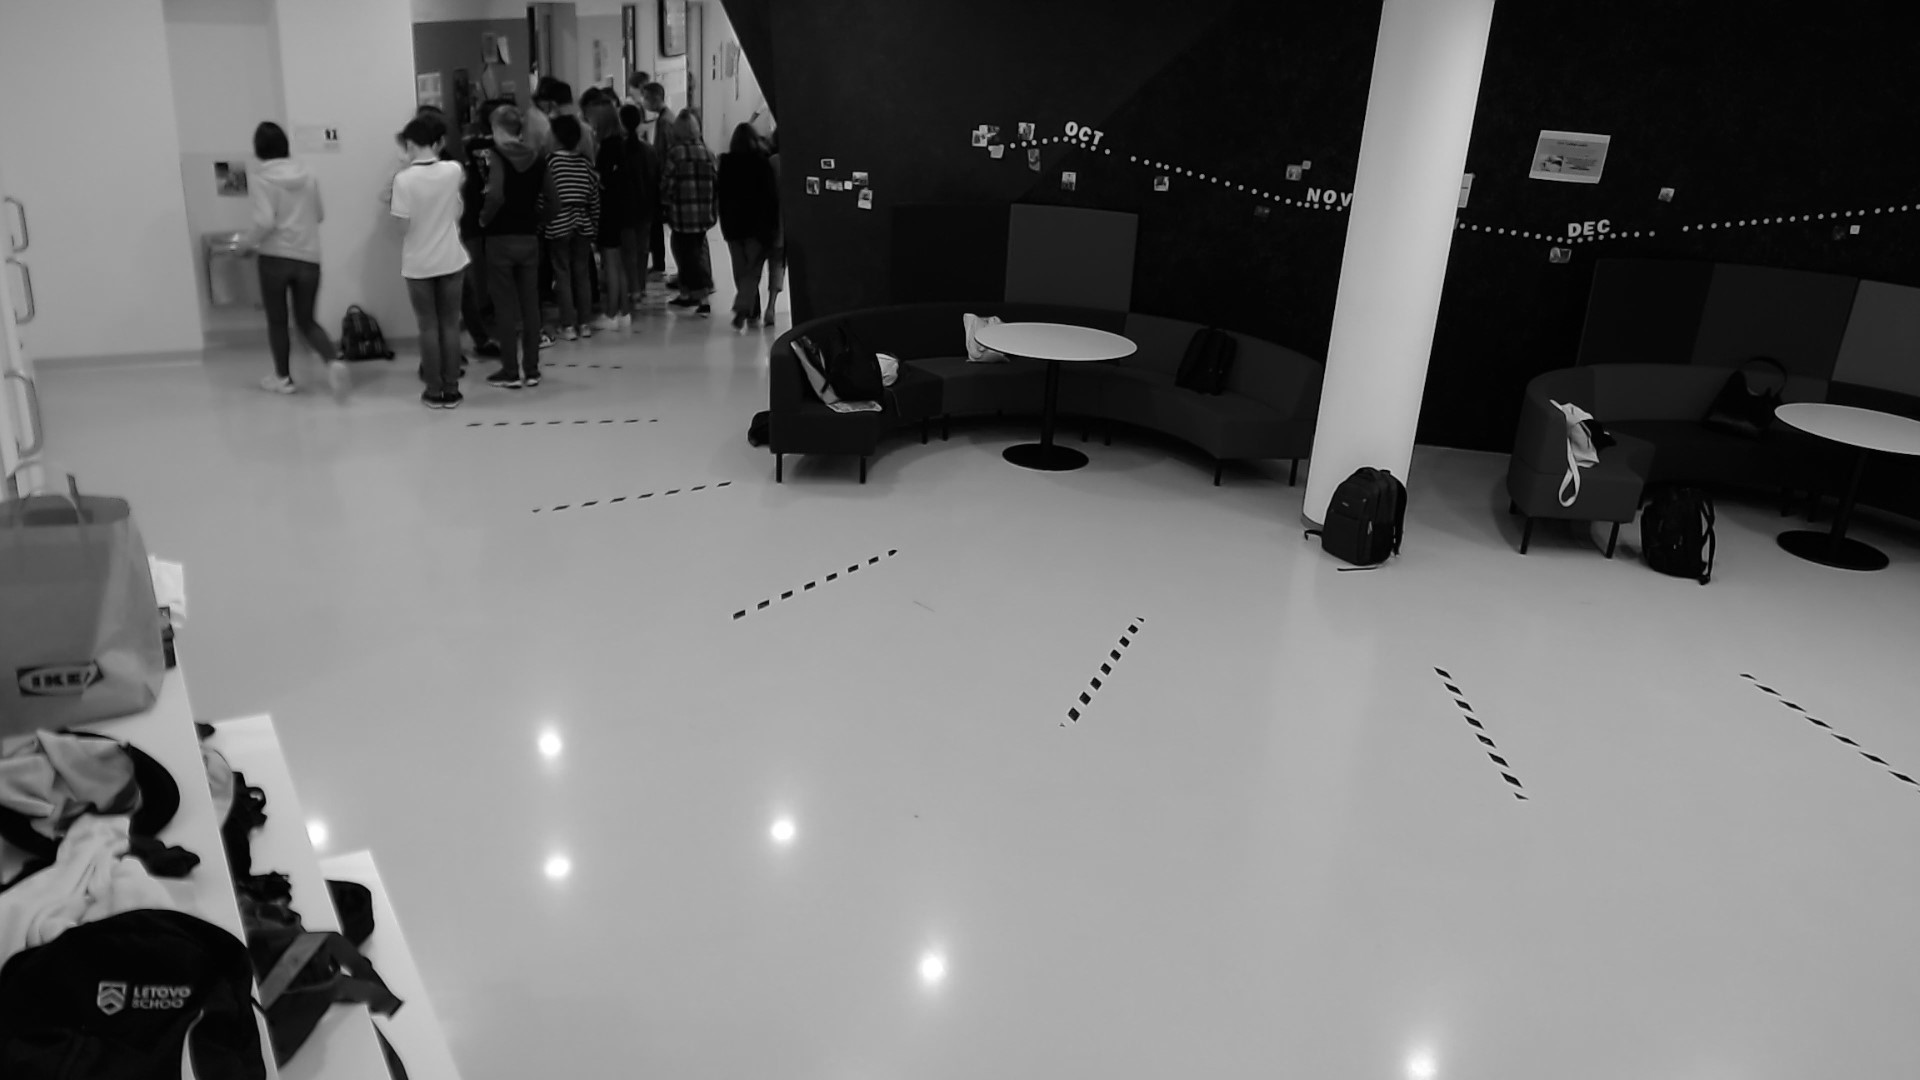

In [18]:
worseQueueImg

In [31]:
diff = ImageChops.difference(worseNoQueueImg, worseQueueImg)
downscaledDiff = scaleImage(diff, 480)
diffImage = scaleImage(downscaledDiff, 1080)
diffImage.save(r"./FinalImages/image1.jpg")

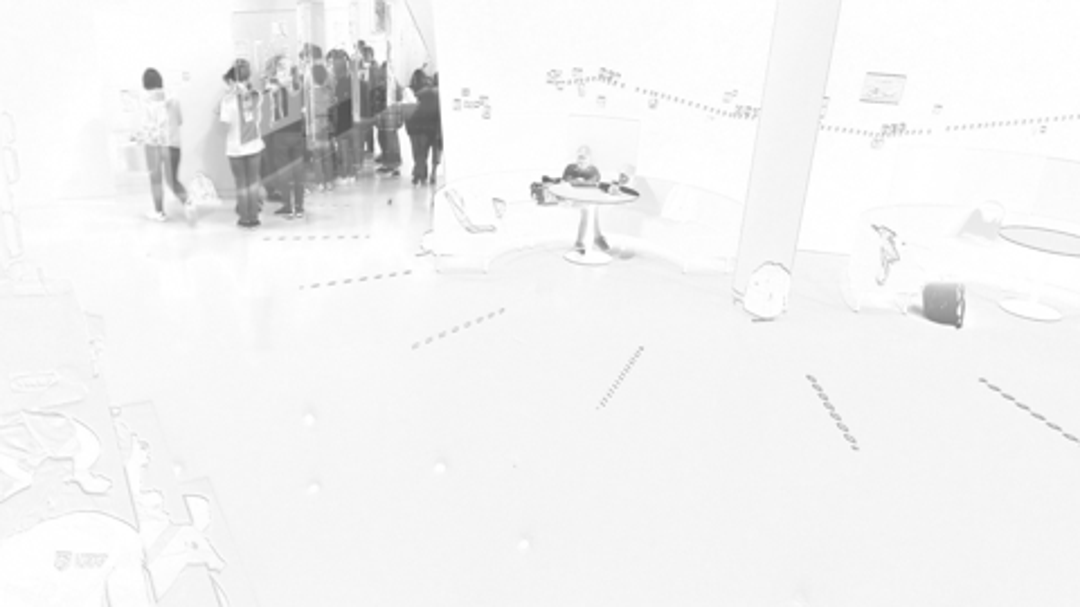

In [32]:
invertDiffImage = PIL.ImageOps.invert(diffImage)
invertDiffImage

In [18]:
def change_contrast(img, level):

    img.load()

    factor = (259 * (level+255)) / (255 * (259-level))
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            color = img.getpixel((x, y))
            new_color = tuple(int(factor * (c-128) + 128) for c in color)
            img.putpixel((x, y), new_color)

    return img

In [19]:
change_contrast(invertDiffImage, 100)

TypeError: 'int' object is not iterable

In [ ]:
# img = cv2.imread(r"./RealCameraPics/person_drinking_small_queue.jpg", flags=0)
# img = cv2.GaussianBlur(img,(3,3), SigmaX=0, SigmaY=0)
img = pil2cv(diff)

edges = cv2.Canny(image=img, threshold1=1, threshold2=100) 

# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)

In [ ]:
diff = ImageChops.difference(worseNoQueueImg, worseQueueImg)
diff

-1

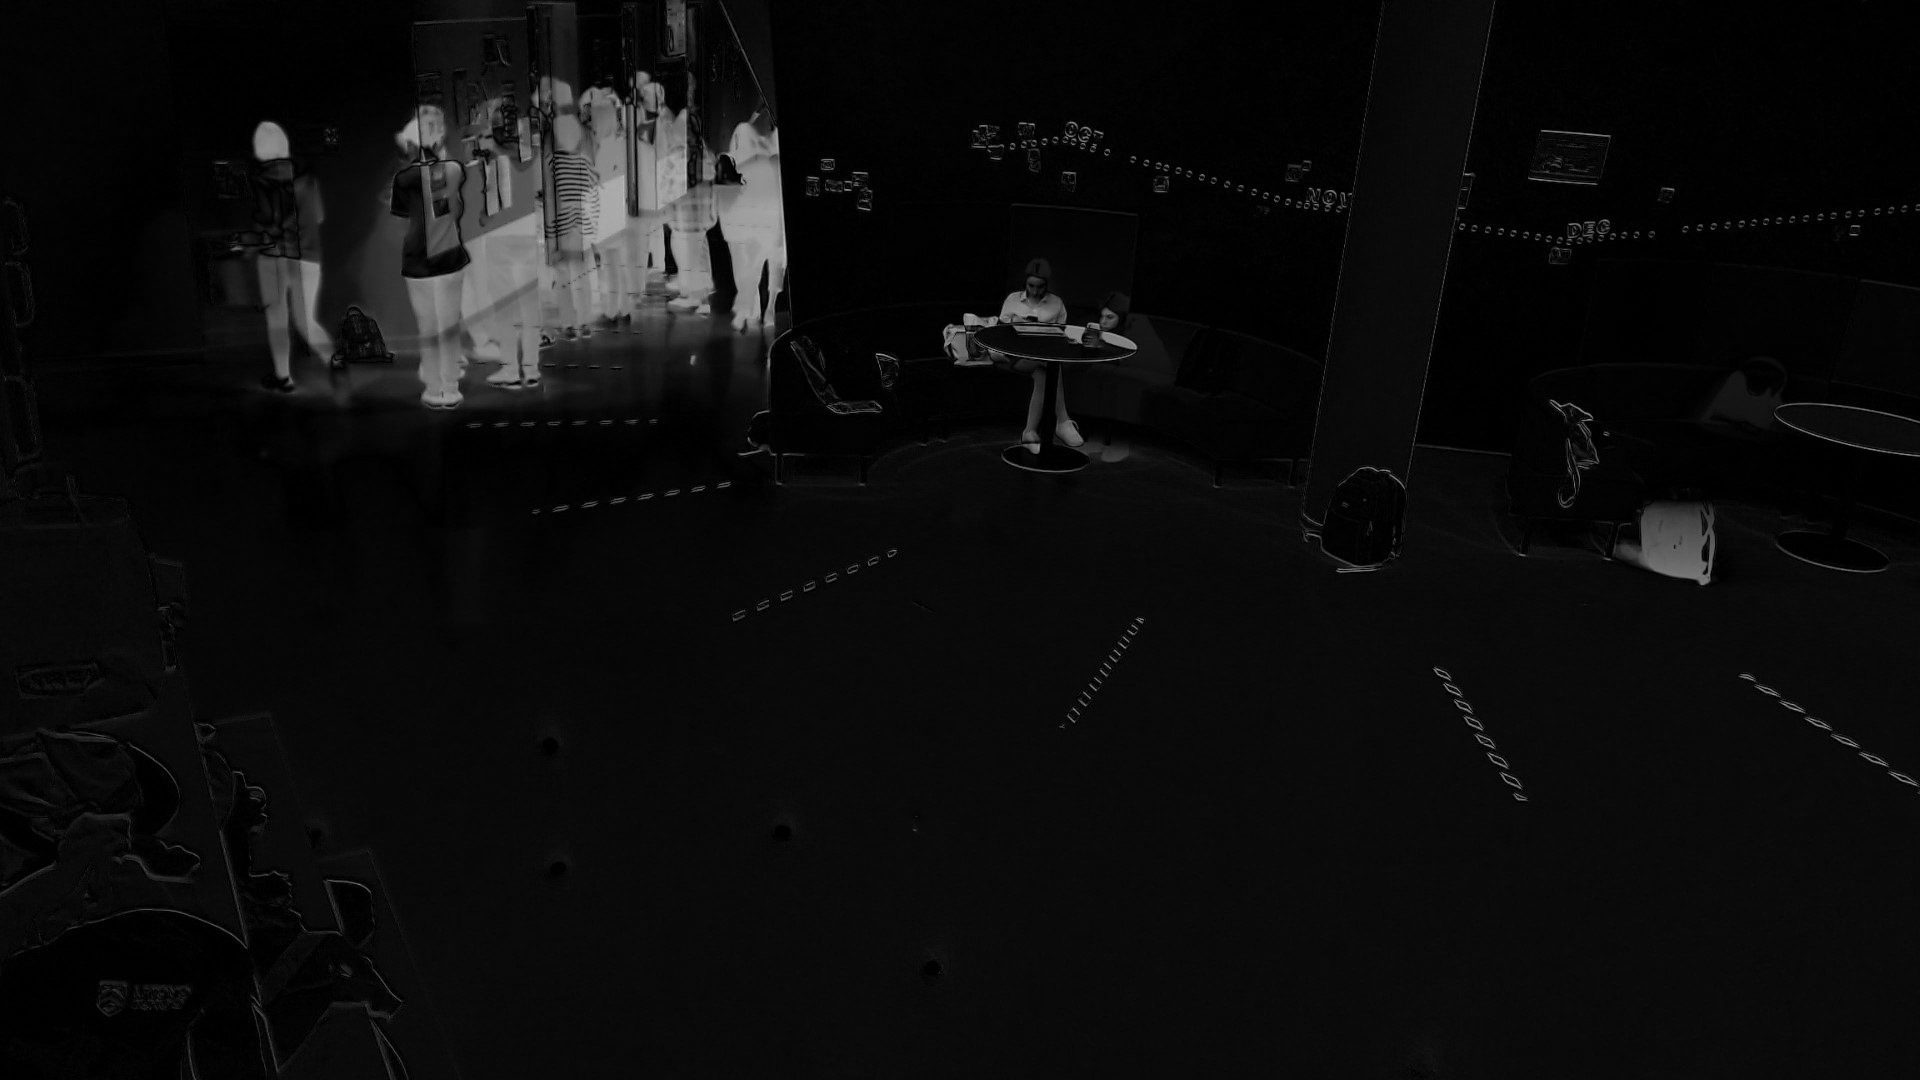

In [34]:
diff = ImageChops.difference(worseNoQueueImg, worseQueueImg)
diff